In [1]:
%matplotlib inline

import os

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, ZeroPadding2D

Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14021722251940709423
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6705950884
locality {
  bus_id: 1
}
incarnation: 17051712276546368875
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
# Load Training Data
path_train = "E:\\Data\\Kaggle\\Dog Breed Recognition\\train"
# path_test = "E:\\Data\\Kaggle\\Dog Breed Recognition\\test"
path_labels = "E:\\Data\\Kaggle\\Dog Breed Recognition"

files_train = os.listdir(path_train)
# files_test = os.listdir(path_test)

In [5]:
def load_data(size=(224,224)):
    im_array = []
    for file in files_train:
        im = Image.open(path_train + "\\" + file)
        im_resize = im.resize(size, Image.ANTIALIAS)
        im_array.append(np.array(im_resize))
        
    train_data = pd.read_csv(path_labels + "\\" + "labels.csv")
    
    return (im_array, train_data)

In [6]:
img_train, train_data = load_data()

In [7]:
id, breed = train_data["id"], train_data["breed"]

In [8]:
num_breed = train_data["breed"].unique()

In [9]:
def displayImg(arrays, labels):
    fig, ax = plt.subplots(4,4, figsize=(16,16), gridspec_kw = {'wspace':0, 'hspace':0})
#     grid = ImageGrid(fig, 111, nrows_ncols=(i, j), axes_pad=0.05)
    for i, img in enumerate(arrays[:16]):
        row, col = i//4, i%4
        ax[row, col].imshow(img)
        ax[row, col].text(0, 120, labels[i], color='k', backgroundcolor='w', alpha=0.8)
        ax[row, col].axis('off')

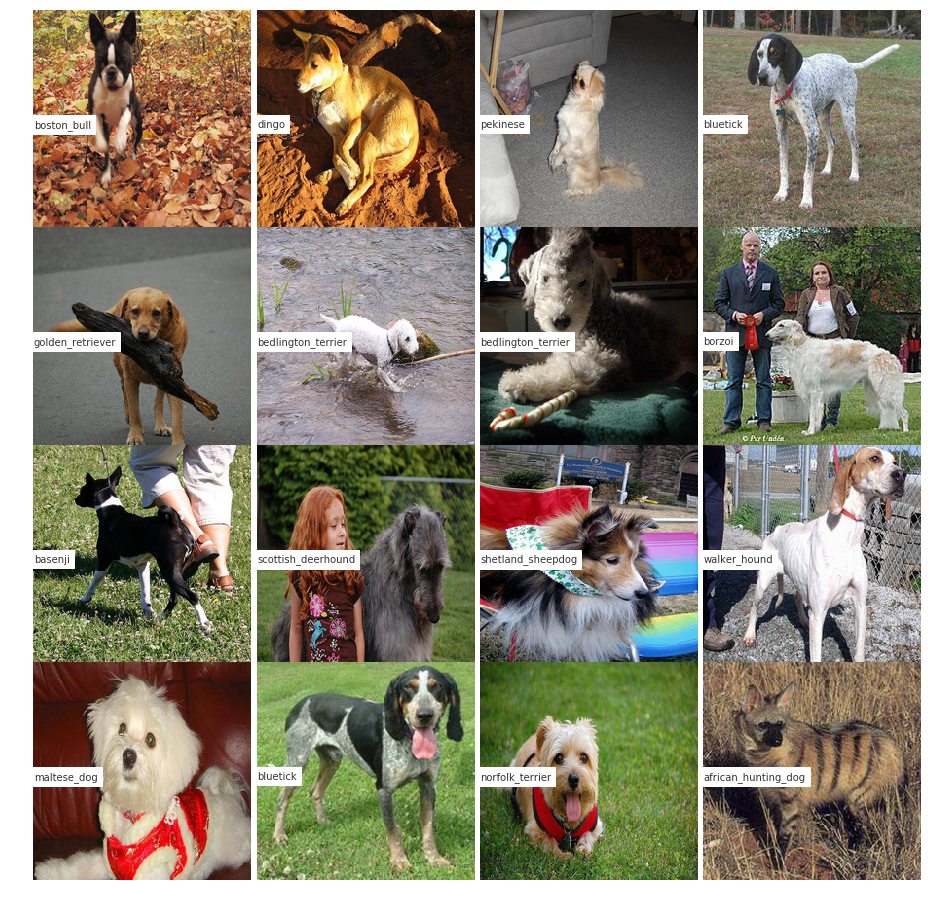

In [10]:
displayImg(img_train, breed)

In [11]:
IMG_LENGTH = 224
IMG_WIDTH = 224
CHANNEL = 3
NUM_CLASSES = len(num_breed)

In [12]:
y = train_data["breed"]

In [13]:
# Preprocessing - Flatten + Normalize
x = np.array([img.flatten()/255 for img in img_train])

In [14]:
# TRAINING MODEL
x_train, x_val, y_train, y_val = train_test_split(x, y.values, test_size=0.2)

In [15]:
m_train = x_train.shape[0]
m_val = x_val.shape[0]
n = x_train.shape[1]
y_train_target = pd.get_dummies(y_train).values
y_val_target = pd.get_dummies(y_val).values
num_classes = y_val_target.shape[1]

x_train_matrix = np.reshape(x_train, [-1, IMG_LENGTH, IMG_WIDTH, CHANNEL])
x_val_matrix = np.reshape(x_val, [-1, IMG_LENGTH, IMG_WIDTH, CHANNEL])

In [16]:
x_train_matrix.shape[1:]

(224, 224, 3)

In [17]:
del x_train
del y_train
del x

In [40]:
def VGG_16():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(x_train_matrix.shape[1:])))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
    
    return model

In [41]:
model = VGG_16()

In [42]:
model.fit(x_train_matrix, y_train_target, epochs=50, batch_size=8)

Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[100352,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_22/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=8887673, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_22/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense_22/random_uniform/RandomUniform', defined at:
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-a7eaece564f9>", line 1, in <module>
    model = VGG_16()
  File "<ipython-input-40-bd97348a4ead>", line 27, in VGG_16
    model.add(Dense(1024, activation='relu'))
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\models.py", line 492, in add
    output_tensor = layer(self.outputs[0])
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\engine\topology.py", line 590, in __call__
    self.build(input_shapes[0])
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\layers\core.py", line 842, in build
    constraint=self.kernel_constraint)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\engine\topology.py", line 411, in add_weight
    weight = K.variable(initializer(shape),
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\initializers.py", line 217, in __call__
    dtype=dtype, seed=self.seed)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py", line 3829, in random_uniform
    dtype=dtype, seed=seed)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\random_ops.py", line 240, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 487, in _random_uniform
    name=name)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\james lin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[100352,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_22/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=8887673, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_22/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
display(model.evaluate(x_val_matrix, y_val_target))

In [ ]:
y_val_target.shape

In [ ]:
# Make predictions with validation set
preds = model.predict(x_val_matrix)

In [ ]:
preds.shape

In [ ]:
preds_breeds = [breed[idx] for idx in np.argmax(preds, axis=1)]

In [ ]:
sum(preds_breeds == y_val)/len(preds_breeds)